<a href="https://colab.research.google.com/github/JavZon/Loan_Eligibility_Prediction/blob/main/Loan_Prediction_Ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Loan Eligibility**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

We import our **Loan Dataset**

In [2]:
df=pd.read_csv('/content/LoanApprovalPrediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

We check primary methods (**info, describe, isnull**)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As it is clear from the info that there are **NaN** values in 7 columns and we can't predict or fill or replace them as they are non-predictable. For example in **Gender** column there are 13 NaNs and we can not exactly say it is **Male** or **Female**. Thus, we drop all the NaN values.

In [8]:
df.dropna(inplace=True)  # we dropped all NaN values

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.shape

(480, 13)

As we can see from df.info() some columns are **object**. So we need to change them to int64 or float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


We start with **Gender** column

In [12]:
df['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [13]:
df['Gender']=df['Gender'].replace({'Male':1, 'Female':0})

In [14]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


Replacing values of **'Married'** column

In [15]:
df['Married'].value_counts()

Married
Yes    311
No     169
Name: count, dtype: int64

In [16]:
df['Married']=df['Married'].replace({'Yes':1, 'No':0})
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


Replacing **Dependents** column

In [17]:
df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

The info shows that there is value called **3+**. This could mean 3,4 or 5 or higher than that. So we change **3+** value to 4

In [27]:
df['Dependents']=df['Dependents'].replace({'3+':4})
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

But the numbers itself is object type so we change them to int64

In [30]:
type(df.at[115, 'Dependents'])

str

In [31]:
df['Dependents']=df['Dependents'].astype('int64')

Now it is turn for **Education** column

In [19]:
df['Education'].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

Replacing will be as follows : Graduate - 1, Not Graduate - 0

In [23]:
df['Education']=df['Education'].replace({'Graduate':1,'Not Graduate':0})
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


Now we look at **Self_Employed** column

In [24]:
df['Self_Employed'].value_counts()

Self_Employed
No     414
Yes     66
Name: count, dtype: int64

In [25]:
df['Self_Employed']=df['Self_Employed'].replace({'Yes':1, 'No':0})
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 68.7+ KB


**Property Area**

In [33]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [34]:
df['Property_Area']=df['Property_Area'].replace({'Rural':0, 'Semiurban':1, 'Urban':2})
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y


Finally we change our **Loan_Status** column values

In [37]:
df['Loan_Status'].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [38]:
df['Loan_Status']=df['Loan_Status'].replace({'Y':1, 'N':0})
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1


We do some Visualization

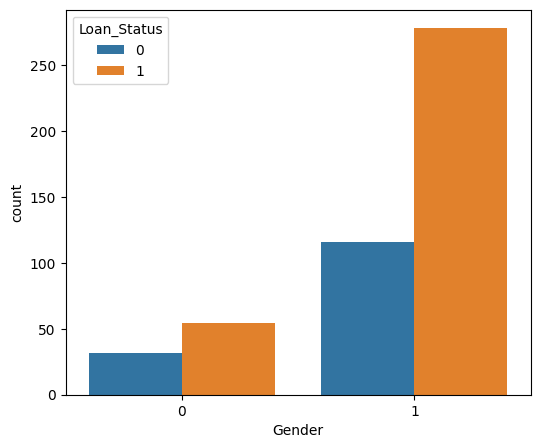

In [42]:
plt.figure(figsize=(6,5))
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.show()

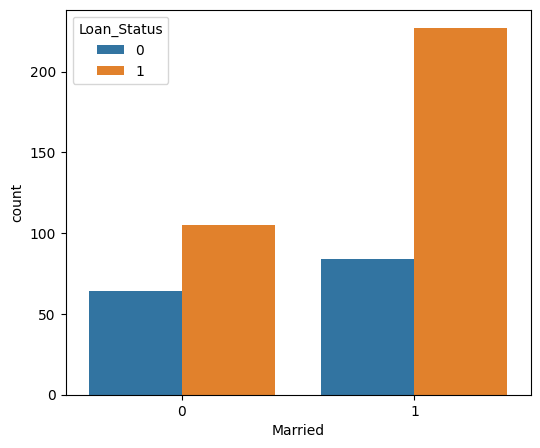

In [43]:
plt.figure(figsize=(6,5))
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.show()

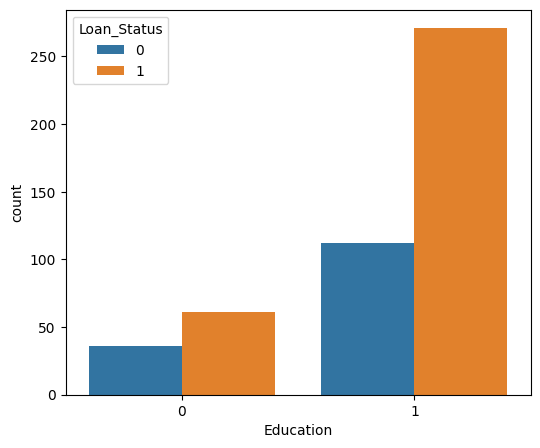

In [44]:
plt.figure(figsize=(6,5))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.show()

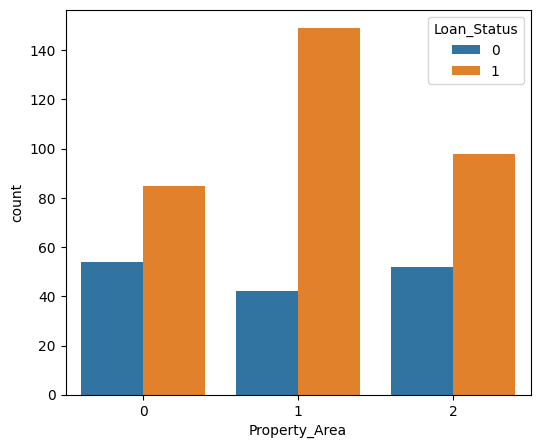

In [45]:
plt.figure(figsize=(6,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.show()

Now we split our df to train and test datesets

In [46]:
from sklearn.model_selection import train_test_split

In [51]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1


We assign variables **X** for x features, **Y** for labels

In [48]:
X=df.drop(columns=['Loan_ID','Loan_Status'])
Y=df['Loan_Status'].copy()

In [52]:
print(X.head(2))
print(Y.head(2))

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   

   Property_Area  
1              0  
2              2  
1    0
2    1
Name: Loan_Status, dtype: int64


We split **X** and **Y** to train and test sets

In [71]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.1,random_state=2, stratify=Y)

In [72]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(480, 11) (432, 11) (48, 11)
(480,) (432,) (48,)


In [73]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
122,0,0,0,1,0,2137,8980.0,137.0,360.0,0.0,1
498,1,1,1,1,1,2895,0.0,95.0,360.0,1.0,1


Now we start our Machine Learning Part. For this we use Support Vector Machine (**SVM**) algorithm.

In [74]:
from sklearn.svm import SVC

In [75]:
classifier=SVC(kernel='linear')

Now we train model

In [76]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

We predict for **X_train**

In [77]:
X_train_prediction=classifier.predict(X_train)

**Evaluation** we use accuracy score

In [79]:
from sklearn.metrics import accuracy_score

In [78]:
Training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("Accuracy score for X_train is -",Training_data_accuracy)

Accuracy score for X_train is - 0.7986111111111112


**Prediction for X_test**

In [81]:
X_test_pred=classifier.predict(X_test)

**Accuracy score** for test set

In [83]:
Test_data_accuracy=accuracy_score(Y_test, X_test_pred)
print("Accuracy score for X_test is -", Test_data_accuracy)

Accuracy score for X_test is - 0.8333333333333334
